In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas import DataFrame
from pmdarima import auto_arima


In [2]:
np.random.seed(0)
nivelsig=0.05
#significatividad 95% 
#Tamaño muestras para graficas
n=1000

In [3]:
#Ruido Blanco gausiano
wn=np.random.randn(n)
#Paseo aleatorio
rw=np.cumsum(np.random.randn(n))
#Paseo aleatorio con deriva
x=np.linspace(0,99,num=n).reshape(-1,1)
puntos= (1 + 0.5 * x).reshape(-1,1)
#rwd=puntos+wn.reshape(-1,1)
#Otra forma de paseo aleatorio con deriva 
ruido=np.random.normal(loc=10,scale=2,size=(x.shape[0])).reshape(-1,1)
rwd=(puntos+ruido).reshape(-1,1)

#No estacionaria varianza?
#ruido3=np.random.uniform(-1,1,size=(puntos.shape[0],1))
#noestvar=puntos*ruido3

noestvar = np.random.normal(0, 1, n)
# Aplicar una transformación no lineal a la serie para hacerla no estacionaria en varianza
noestvar = np.exp(noestvar)
# Restar la media de la serie para hacerla estacionaria en media
noestvar = noestvar  - np.mean(noestvar)
#sale no estacionaria con adf
#pruebo a generarla diferente

#Serie no estacionaria ni en media ni varianza
noest=(x*ruido).reshape(-1,1)
#plt.plot(ruido)
#tmb sale no estacionaria con adf

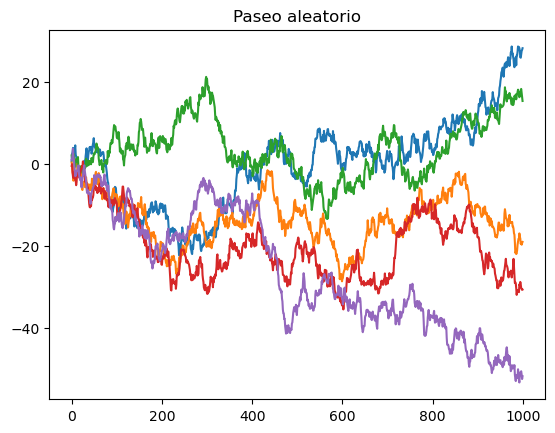

In [4]:
#Graficas paseo aleatorio


for i in range(0,5):
    plt.plot(np.cumsum(np.random.normal(0,1,1000)))
    
plt.title('Paseo aleatorio')    
plt.show()

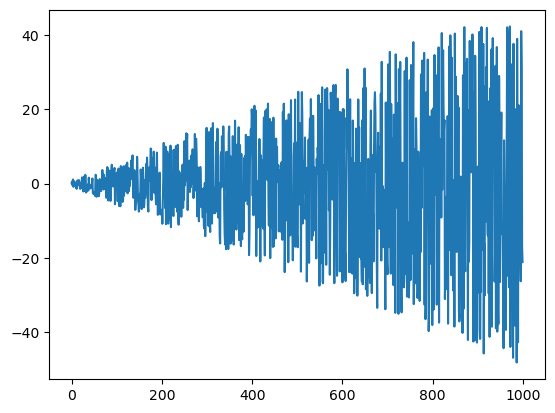

In [5]:

#ðejar comentado
#Otra implementación de serie no estacionaria en  varianza
ruido3=np.random.uniform(-1,1,size=(puntos.shape[0],1))
noestvarprueba=puntos*ruido3
noestvar=noestvarprueba
plt.plot(noestvar)


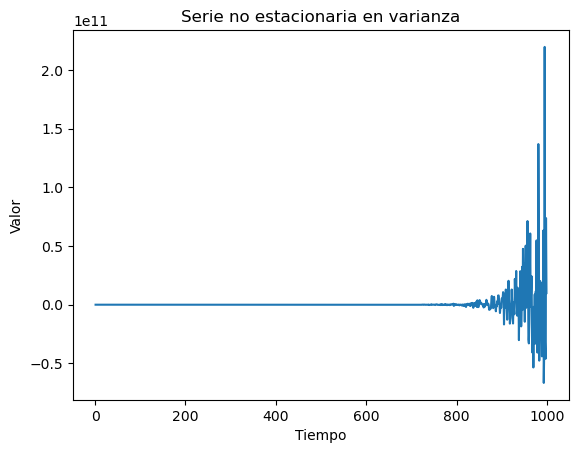

In [6]:
#pruena de no estacionaria en tendencia a ver si se sigue mostrando como no estacionaria despues de KPSS en primeras diferencias

import numpy as np
import matplotlib.pyplot as plt
n=1000
# Definir parámetros del proceso ARIMA
phi = 0.0 # Coeficiente autoregresivo
theta = 0.0 # Coeficiente de media móvil
t = np.arange(1, n) # Vector de tiempo
sigma = np.exp(0.05 * t) # Varianza que cambia en el tiempo

# Generar la serie
noestvar2 = np.zeros(len(t))
e = np.random.normal(0, np.sqrt(sigma[0]), size=1) # Error inicial con varianza constante
for i in range(1, len(t)):
    e = np.append(e, np.random.normal(0, np.sqrt(sigma[i]), size=1))
    noestvar2[i] = phi * noestvar2[i-1] + theta * e[i] + e[i]

# Graficar la serie
plt.plot(t, noestvar2)
plt.title("Serie no estacionaria en varianza")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.show()
noestvar=noestvar2

In [7]:
#otro ejemplo q ver si es no estacionaria al aplicar primeras diferencias
#esta no vale porque tampoco es en media

# Crear una serie de tiempo no estacionaria en varianza
#np.random.seed(0)
#t = np.arange(n)
#y = np.exp(0.02*t + 0.1*np.random.randn(n))

#noestvar=y

Hipotesis nula ADF serie no estacionaria

/tmp/ipykernel_15197/3783235441.py:33: RuntimeWarning: invalid value encountered in log
  ax[3,0].plot(np.log(rw))
/tmp/ipykernel_15197/3783235441.py:37: RuntimeWarning: divide by zero encountered in log
  ax[3,2].plot(np.log(noestvar))
/tmp/ipykernel_15197/3783235441.py:37: RuntimeWarning: invalid value encountered in log
  ax[3,2].plot(np.log(noestvar))
/tmp/ipykernel_15197/3783235441.py:39: RuntimeWarning: divide by zero encountered in log
  ax[3,3].plot(np.log(noest))
/tmp/ipykernel_15197/3783235441.py:43: RuntimeWarning: invalid value encountered in log
  ax[4,0].plot(np.log(np.diff(rw,axis=0)))
/tmp/ipykernel_15197/3783235441.py:45: RuntimeWarning: invalid value encountered in log
  ax[4,1].plot(np.log(np.diff(rwd,axis=0)))
/tmp/ipykernel_15197/3783235441.py:47: RuntimeWarning: invalid value encountered in log
  ax[4,2].plot(np.log(np.diff(noestvar,axis=0)))
/tmp/ipykernel_15197/3783235441.py:49: RuntimeWarning: invalid value encountered in log
  ax[4,3].plot(np.log(np.diff(noest

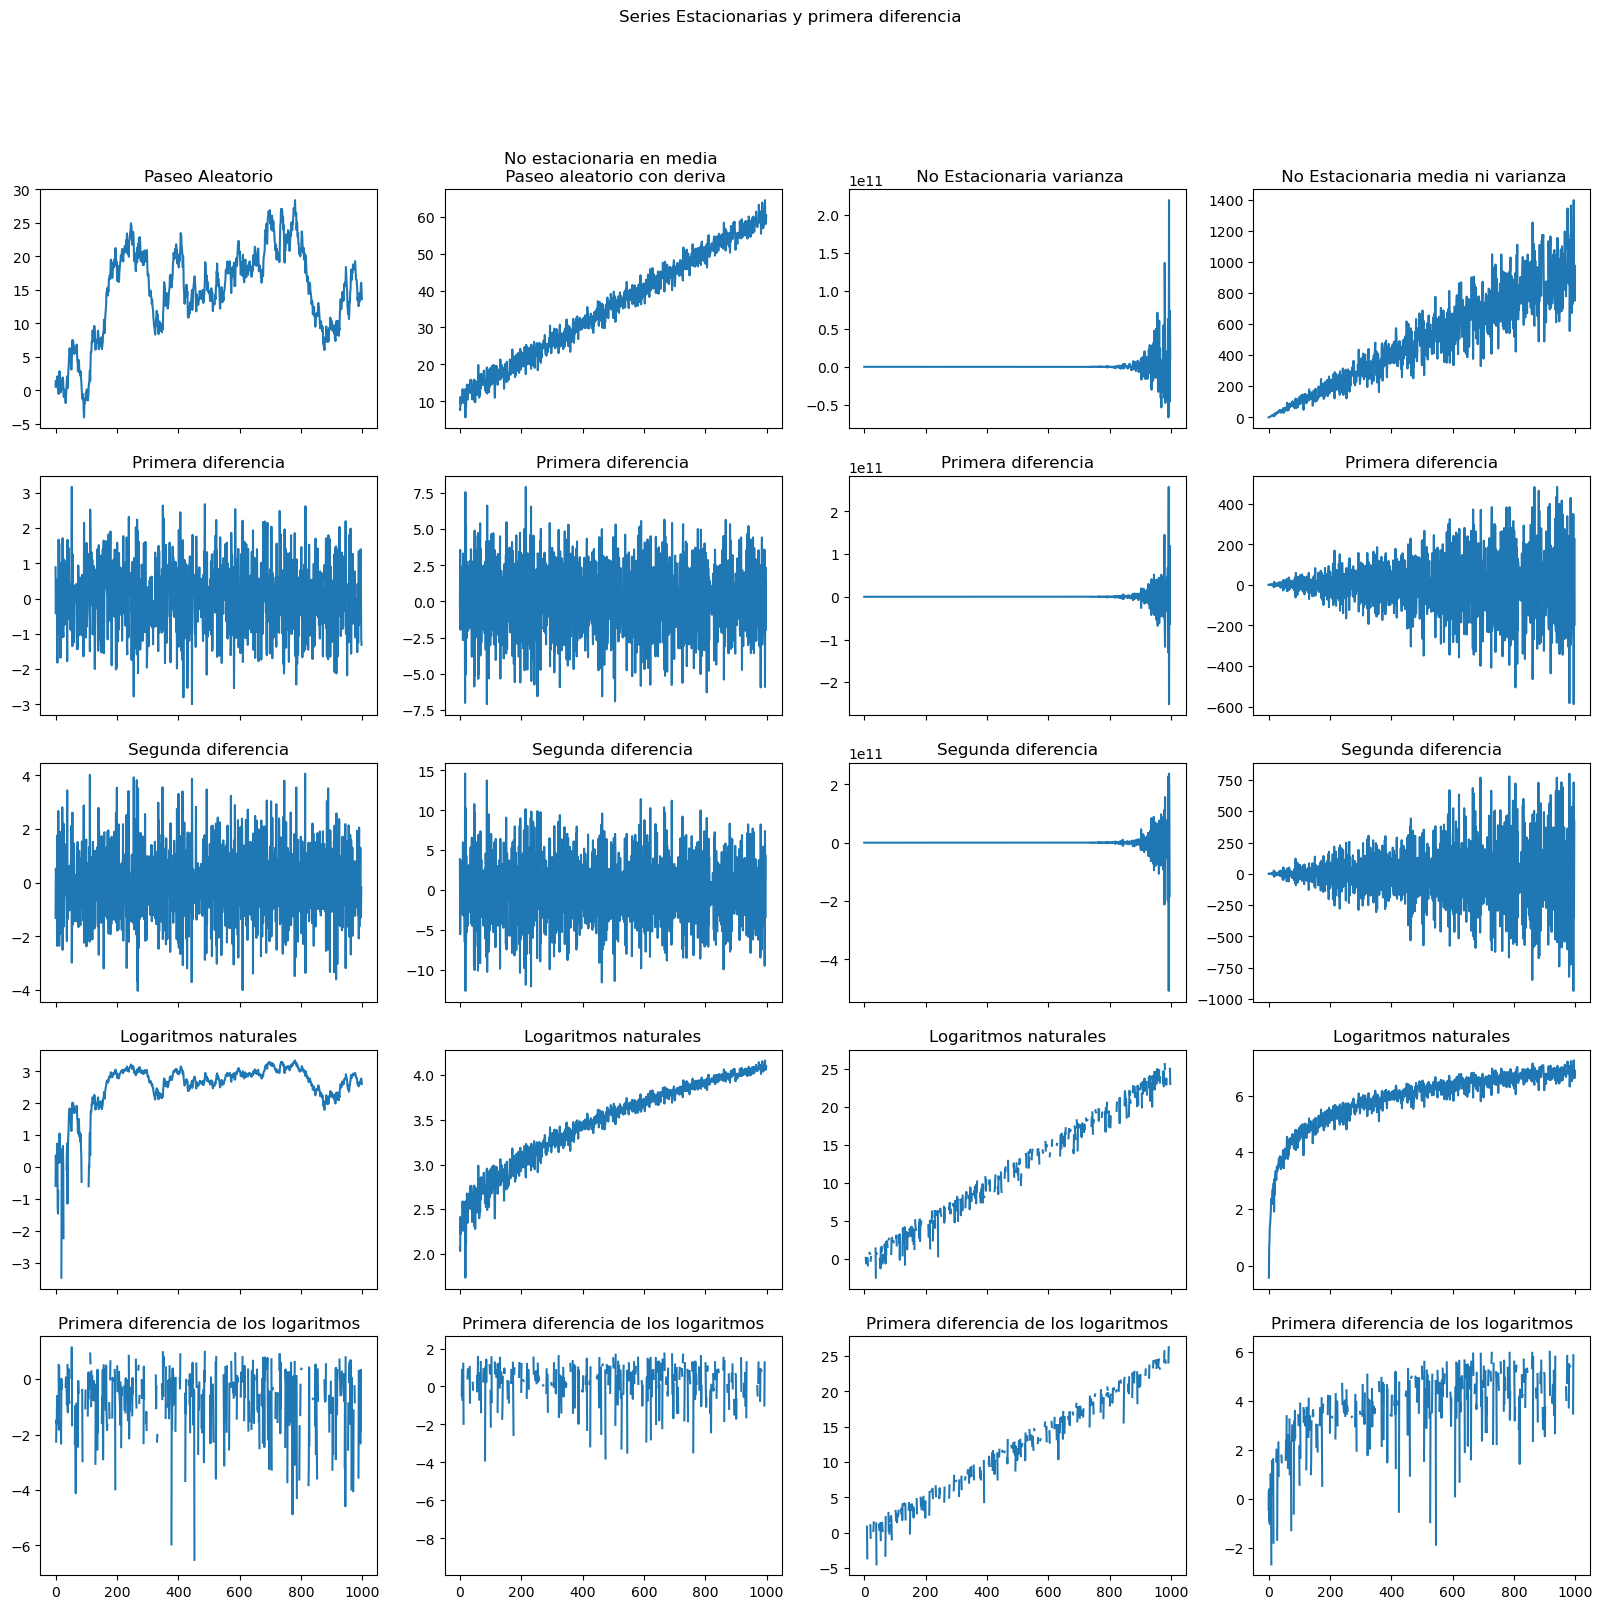

In [9]:
fig, ax = plt.subplots(5, 4, sharex=True,figsize=(20, 18))

ax[0,0].set_title('Paseo Aleatorio')
ax[0,0].plot(rw)
ax[0,1].set_title('No estacionaria en media \n Paseo aleatorio con deriva')
ax[0,1].plot(rwd)
ax[0,2].set_title(' No Estacionaria varianza')
ax[0,2].plot(noestvar)
ax[0,3].set_title(' No Estacionaria media ni varianza')
ax[0,3].plot(noest)


ax[1,0].set_title('Primera diferencia')
ax[1,0].plot(np.diff(rw,axis=0))
ax[1,1].set_title('Primera diferencia')
ax[1,1].plot(np.diff(rwd,axis=0))
ax[1,2].set_title('Primera diferencia')
ax[1,2].plot(np.diff(noestvar,axis=0))
ax[1,3].set_title('Primera diferencia')
ax[1,3].plot(np.diff(noest,axis=0))


ax[2,0].set_title('Segunda diferencia')
ax[2,0].plot(np.diff(rw,axis=0,n=2))
ax[2,1].set_title('Segunda diferencia')
ax[2,1].plot(np.diff(rwd,axis=0,n=2))
ax[2,2].set_title('Segunda diferencia')
ax[2,2].plot(np.diff(noestvar,axis=0,n=2))
ax[2,3].set_title('Segunda diferencia')
ax[2,3].plot(np.diff(noest,axis=0,n=2))

ax[3,0].set_title('Logaritmos naturales')
ax[3,0].plot(np.log(rw))
ax[3,1].set_title('Logaritmos naturales')
ax[3,1].plot(np.log(rwd))
ax[3,2].set_title('Logaritmos naturales')
ax[3,2].plot(np.log(noestvar))
ax[3,3].set_title('Logaritmos naturales')
ax[3,3].plot(np.log(noest))


ax[4,0].set_title('Primera diferencia de los logaritmos')
ax[4,0].plot(np.log(np.diff(rw,axis=0)))
ax[4,1].set_title('Primera diferencia de los logaritmos')
ax[4,1].plot(np.log(np.diff(rwd,axis=0)))
ax[4,2].set_title('Primera diferencia de los logaritmos')
ax[4,2].plot(np.log(np.diff(noestvar,axis=0)))
ax[4,3].set_title('Primera diferencia de los logaritmos')
ax[4,3].plot(np.log(np.diff(noest,axis=0)))

fig.suptitle('Series Estacionarias y primera diferencia')
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

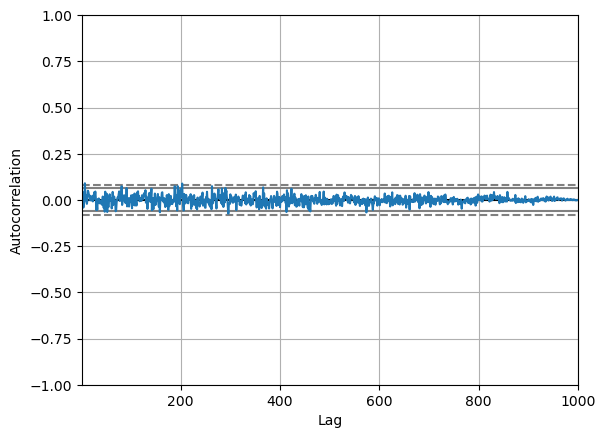

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(wn)

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


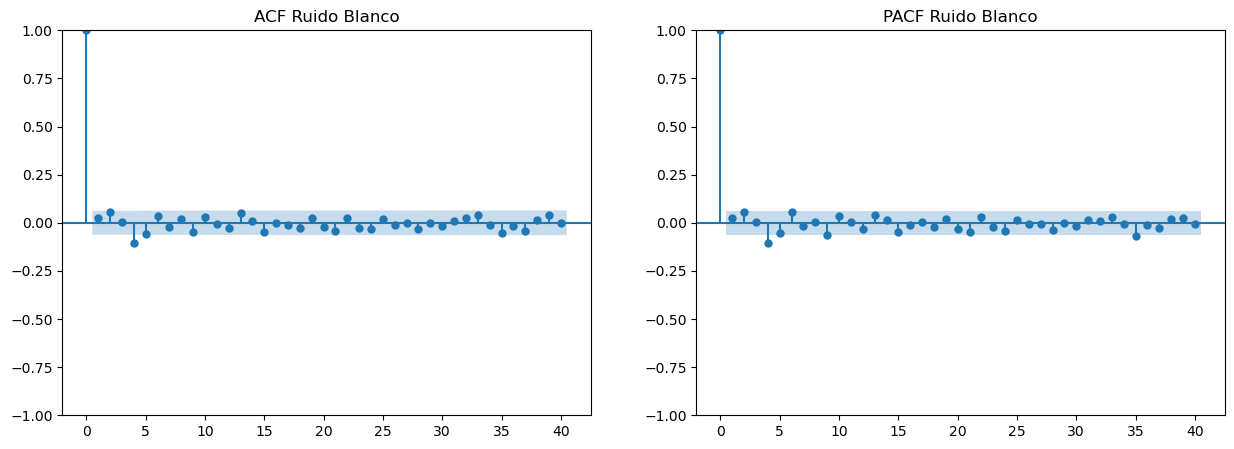

In [11]:
#Correlograma ruido blanco
wn=np.random.normal(0,1,1000)
fig, ax = plt.subplots(1,2, sharex=True,figsize=(15, 5))
sm.graphics.tsa.plot_acf(wn, lags=40, ax=ax[0],title='ACF Ruido Blanco',alpha=0.05)
sm.graphics.tsa.plot_pacf(wn,lags=40, ax=ax[1],title='PACF Ruido Blanco')

plt.show()

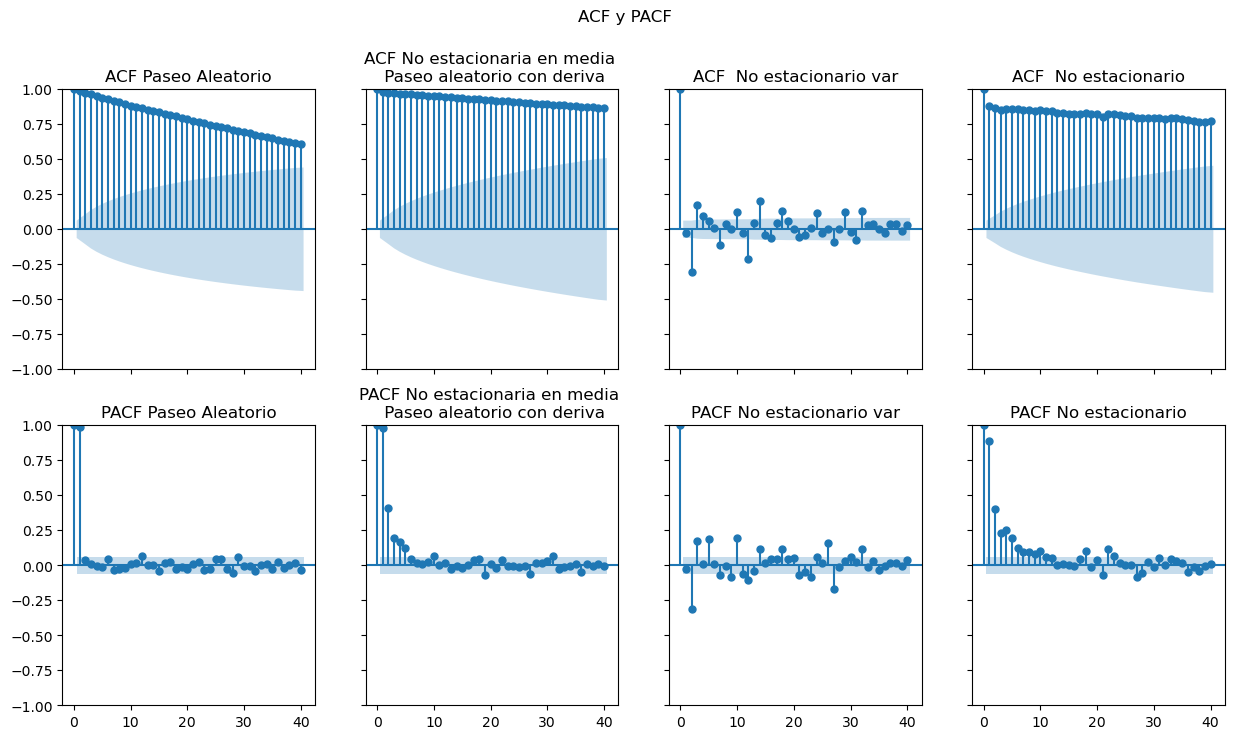

In [12]:
#Explicar primero valor = 1 ro0/ro0. En el libro los muestra a partor del retardo 1
fig, ax = plt.subplots(2,4, sharex=True,sharey=True,figsize=(15, 8))
fig=sm.graphics.tsa.plot_acf(rw, lags=40, ax=ax[0,0],title='ACF Paseo Aleatorio')
fig=sm.graphics.tsa.plot_pacf(rw,lags=40, ax=ax[1,0],title='PACF Paseo Aleatorio')

fig=sm.graphics.tsa.plot_acf(rwd, lags=40, ax=ax[0,1],title='ACF No estacionaria en media \n Paseo aleatorio con deriva')
fig=sm.graphics.tsa.plot_pacf(rwd,lags=40, ax=ax[1,1],title='PACF No estacionaria en media \n Paseo aleatorio con deriva')

fig=sm.graphics.tsa.plot_acf(noestvar, lags=40, ax=ax[0,2],title='ACF  No estacionario var')
fig=sm.graphics.tsa.plot_pacf(noestvar,lags=40, ax=ax[1,2],title='PACF No estacionario var')

fig=sm.graphics.tsa.plot_acf(noest, lags=40, ax=ax[0,3],title='ACF  No estacionario')
fig=sm.graphics.tsa.plot_pacf(noest,lags=40, ax=ax[1,3],title='PACF No estacionario')


fig.suptitle('ACF y PACF')
plt.show()

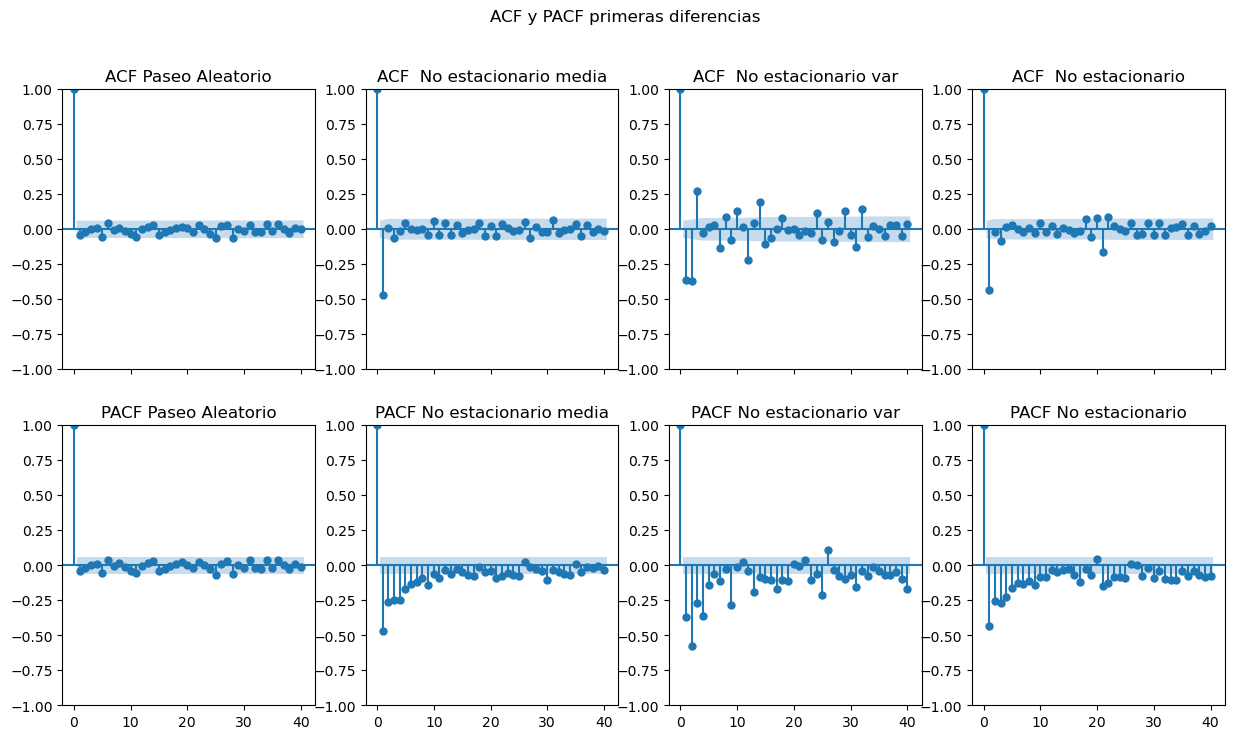

In [13]:
fig, ax = plt.subplots(2,4, sharex=True,figsize=(15, 8))
fig=sm.graphics.tsa.plot_acf(np.diff(rw,axis=0),lags=40, ax=ax[0,0],title='ACF Paseo Aleatorio')
fig=sm.graphics.tsa.plot_pacf(np.diff(rw,axis=0),lags=40, ax=ax[1,0],title='PACF Paseo Aleatorio')

fig=sm.graphics.tsa.plot_acf(np.diff(rwd,axis=0),lags=40, ax=ax[0,1],title='ACF  No estacionario media')
fig=sm.graphics.tsa.plot_pacf(np.diff(rwd,axis=0),lags=40, ax=ax[1,1],title='PACF No estacionario media')

fig=sm.graphics.tsa.plot_acf(np.diff(noestvar,axis=0),lags=40, ax=ax[0,2],title='ACF  No estacionario var')
fig=sm.graphics.tsa.plot_pacf(np.diff(noestvar,axis=0),lags=40, ax=ax[1,2],title='PACF No estacionario var')

fig=sm.graphics.tsa.plot_acf(np.diff(noest,axis=0),lags=40, ax=ax[0,3],title='ACF  No estacionario')
fig=sm.graphics.tsa.plot_pacf(np.diff(noest,axis=0),lags=40, ax=ax[1,3],title='PACF No estacionario')

fig.suptitle('ACF y PACF primeras diferencias')
plt.show()

## Deteccion de estacionariedad mediante estadísticos

In [14]:
#Augmented Diceky fuller
#df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')

In [15]:
def estacionariedad (data,nivelsig):
    adf=adfuller(data)
    print(" Estadistico ADF {}".format(adf[0]))
    print(" P-value {}".format(adf[1]))
    if adf[1] < nivelsig:
        print("Rechazo Hipotesis Nula de no estacionariedad al {} %".format((1-nivelsig)*100))
    else:
        print("No Rechazo Hipotesis de no estacionariedad al {} %".format((1-nivelsig)*100))

In [16]:
#Funcion que devuelve el pvalor del estadiscito ADF para un nivel de significatividad
def pvalstacionariedad(data,nivelsig):
    adf=adfuller(data)
    return adf[1]

Construir un diccionario en el que cada tipo de serie lleva asociado su pvalor para ADF

In [17]:
dicadf={'Ruido Blanco':pvalstacionariedad(wn,nivelsig),'Paseo aleatorio':pvalstacionariedad(rw,nivelsig),'No estacionaria en media':pvalstacionariedad(rwd,nivelsig),\
       'No estacionaria en var':pvalstacionariedad(noestvar,nivelsig),'No estacionaria':pvalstacionariedad(noest,nivelsig)}

In [18]:

#Construir un dataframe con el tipo de serie,pvalue y una tercera columna si es estacionaria o no

dfadfuller=DataFrame(data=dicadf.items(),columns=['Serie','Pvalue'])
dfadfuller['Estacionariedad']=['EST' if dfadfuller['Pvalue'][i] < nivelsig  else 'NO' for i in range(len(dfadfuller))]

In [19]:
dfadfuller

,Serie,Pvalue,Estacionariedad
0,Ruido Blanco,8.334354e-25,EST
1,Paseo aleatorio,5.857823e-02,NO
2,No estacionaria en media,9.112400e-01,NO
3,No estacionaria en var,2.188361e-04,EST
4,No estacionaria,8.566254e-01,NO


Como se aprecia adf muestra no estacionariedad cuando no lo es en media pero si cuando es estacionaria en media pero no varianza.
Se añade columna con el estadístico KPSS para solventar este caso

In [20]:
#kpss  para detectar tendencia
def estacionariedadkpss (data,nivelsig):
    testkpss=kpss(data,'c')
    print(" Estadistico ADF {}".format(adf[0]))
    print(" P-value {}".format(adf[1]))
    if testkpss[1] < nivelsig:
        print("Rechazo Hipotesis Nula de estacionariedad  al {} % \n  estacionaria".format((1-nivelsig)*100))
    else:
        print("No Rechazo Hipotesis de estacionariedad  al {} % \n NO Estacionaria".format((1-nivelsig)*100))

In [21]:
#Pavlue de kpss para estacionariedad sobre una constante. Se busca que muestre cuando no es estacionario en media
#para solventar la discrepancia con ADF
def pvalkpss(data,nivelsig):
    testkpss=kpss(data,'c')
    return testkpss[1]
#kpss(wn,'ct')
#* "c" : The data is stationary around a constant (default).
# "ct" : The data is stationary around a trend.

In [22]:
#Creación de diccionaro con tipo de serie y el pvalor de kpss para posteiormemnte añadirlo al daftaframe
# y tener todos los datos para comparatoria
dickpss={'Ruido Blanco':pvalkpss(wn,nivelsig),'Paseo aleatorio':pvalkpss(rw,nivelsig),'No estacionaria en media':pvalkpss(rwd,nivelsig),\
       'No estacionaria en var':pvalkpss(noestvar,nivelsig),'No estacionaria':pvalkpss(noest,nivelsig)}

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of t

In [23]:
dfadfuller['KPSS']=dickpss.values()
dfadfuller['EstacionariedadKPSS']=['Determinista' if dfadfuller['KPSS'][i] <= nivelsig  else 'NO' for i in range(len(dfadfuller))]
#Funcion para cambiar el fondo si no coinciden los estadísticos y adfuller detecta estacionariedad
#De esta manera se resalta al columna en caso de serie estacionaria segun adf pero presenta tendencia
#Estacionariedad segun el criterio de KPSS quiere decir ppresencia de tendencia determinista
def highlight_cells(row):
    if row['Estacionariedad'] == 'EST' and row['EstacionariedadKPSS']=='Determinista':
        return ['background-color: red']*5
    else:
        return ['']*5
dfadfuller.style.apply(highlight_cells, axis=1)

,Serie,Pvalue,Estacionariedad,KPSS,EstacionariedadKPSS
0,Ruido Blanco,0.000000,EST,0.100000,NO
1,Paseo aleatorio,0.058578,NO,0.010000,Determinista
2,No estacionaria en media,0.911240,NO,0.010000,Determinista
3,No estacionaria en var,0.000219,EST,0.010000,Determinista
4,No estacionaria,0.856625,NO,0.010000,Determinista


In [24]:
#Se aplican primeras diferencias y a continuación los estadisticos adf y kpss

In [25]:
dicadf1dif={'Ruido Blanco':pvalstacionariedad(np.diff(wn,axis=0),nivelsig),'Paseo aleatorio':pvalstacionariedad(np.diff(rw,axis=0),nivelsig),'No estacionaria en media':pvalstacionariedad(np.diff(rwd,axis=0),nivelsig),\
'No estacionaria en var':pvalstacionariedad(np.diff(noestvar,axis=0),nivelsig),'No estacionaria':pvalstacionariedad(np.diff(noest,axis=0),nivelsig)}

In [26]:
dickpss1dif={'Ruido Blanco':pvalkpss(np.diff(wn,axis=0),nivelsig),'Paseo aleatorio':pvalkpss(np.diff(rw,axis=0),nivelsig),'No estacionaria en media':pvalkpss(np.diff(rwd,axis=0),nivelsig),\
'No estacionaria en var':pvalkpss(np.diff(noestvar,axis=0),nivelsig),'No estacionaria':pvalkpss(np.diff(noest,axis=0),nivelsig)}

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of t

In [27]:
dfadfuller['PrimeradiferenciaADF']=dicadf1dif.values()
dfadfuller['PrimeradiferenciaKPSS']=dickpss1dif.values()

In [28]:
dfadfuller['EstacionariedadADF1dif']=['EST' if dfadfuller['PrimeradiferenciaADF'][i] < nivelsig  else 'NO' for i in range(len(dfadfuller))]
dfadfuller['EstacionariedadKPSS1dif']=['EST' if dfadfuller['PrimeradiferenciaKPSS'][i] < nivelsig  else 'NO' for i in range(len(dfadfuller))]

In [29]:
dfadfuller

,Serie,Pvalue,Estacionariedad,KPSS,EstacionariedadKPSS,PrimeradiferenciaADF,PrimeradiferenciaKPSS,EstacionariedadADF1dif,EstacionariedadKPSS1dif
0,Ruido Blanco,8.334354e-25,EST,0.10,NO,1.610585e-21,0.1,EST,NO
1,Paseo aleatorio,5.857823e-02,NO,0.01,Determinista,0.000000e+00,0.1,EST,NO
2,No estacionaria en media,9.112400e-01,NO,0.01,Determinista,2.457874e-21,0.1,EST,NO
3,No estacionaria en var,2.188361e-04,EST,0.01,Determinista,2.017537e-22,0.1,EST,NO
4,No estacionaria,8.566254e-01,NO,0.01,Determinista,8.705556e-23,0.1,EST,NO


In [30]:
#perform KPSS test
#sm.tsa.stattools.kpss(wn, regression='ct')
#sm.tsa.stattools.kpss(wn, regression='c')

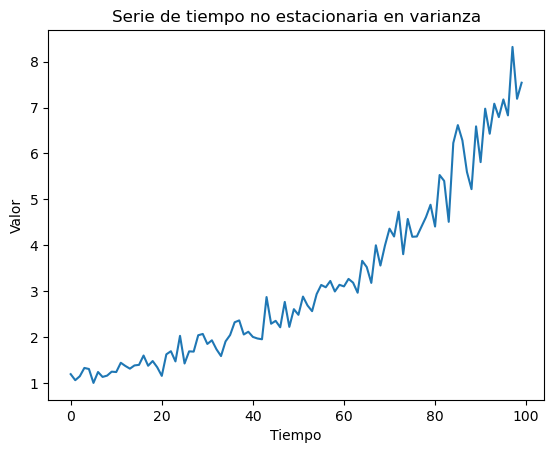

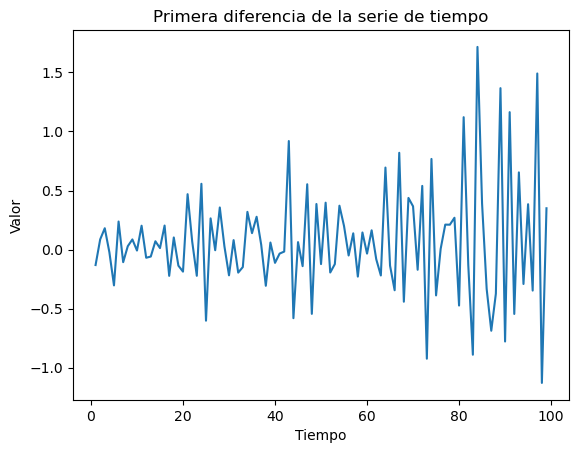

La primera diferencia de la serie de tiempo es no estacionaria en varianza


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una serie de tiempo no estacionaria en varianza
np.random.seed(0)
t = np.arange(100)
y = np.exp(0.02*t + 0.1*np.random.randn(100))

# Mostrar la serie de tiempo
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Serie de tiempo no estacionaria en varianza')
plt.show()

# Aplicar la primera diferencia
y_diff = np.diff(y)

# Mostrar la serie de tiempo de la primera diferencia
plt.plot(t[1:], y_diff)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Primera diferencia de la serie de tiempo')
plt.show()

# Verificar la estacionariedad en varianza de la serie de tiempo de la primera diferencia
from statsmodels.tsa.stattools import kpss
kpss_stat, p_value, lags, critical_values = kpss(y_diff, regression='c')

# Obtener los valores críticos correspondientes al nivel de significación del 5%
critical_value_5percent = critical_values['5%']

# Comparar el estadístico de prueba con el valor crítico
if kpss_stat > critical_value_5percent:
    print('La primera diferencia de la serie de tiempo es no estacionaria en varianza')
else:
    print('La primera diferencia de la serie de tiempo es estacionaria en varianza')


In [32]:
kpss(rw)

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.2935550026767026,
 0.01,
 19,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [33]:
#kpss  para detectar tendencia
def estacionariedadkpss (data,nivelsig):
    testkpss=kpss(data,'ct')
    print(" Estadistico ADF {}".format(adf[0]))
    print(" P-value {}".format(adf[1]))
    if testkpss[1] < nivelsig:
        print("Rechazo Hipotesis Nula de estacionariedad en tendencia al {} % \n NO estacionaria".format((1-nivelsig)*100))
    else:
        print("No Rechazo Hipotesis de estacionariedad en tendencia al {} % \n Estacionaria".format((1-nivelsig)*100))

In [34]:
def pvalkpss(data,nivelsig):
    testkpss=kpss(data,'c')
    return testkpss[1]
#kpss(wn,'ct')
#* "c" : The data is stationary around a constant (default).
# "ct" : The data is stationary around a trend.

In [35]:
#Ojo que da a veces 0,1 como calcula el estadistico. NO muestra valores y y nunca es mas pequeño qyue 0.05
#https://stats.stackexchange.com/questions/518458/kpss-test-p-value-greater-than-0-05-but-test-statistic-is-less-than-critical-va
#https://stat.ethz.ch/pipermail/r-help/2005-March/067338.html
nivelsig=0.05
dickpss={'Ruido Blanco':pvalkpss(wn,nivelsig),'Paseo aleatorio':pvalkpss(rw,nivelsig),'No estacionaria en media':pvalkpss(rwd,nivelsig),\
       'No estacionaria en var':pvalkpss(noestvar,nivelsig),'No estacionaria':pvalkpss(noest,nivelsig)}

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of t

In [37]:

#Da diferente resultado depende alfa.Por  algun motivo no hay menores que 0.05 para ruido blanco o est en media

In [38]:
dfadfuller['KPSS']=dickpss.values()
dfadfuller['EstacionariedadKPSS']=['EST' if dfadfuller['KPSS'][i] <= nivelsig  else 'NO' for i in range(len(dfadfuller))]

In [39]:
dfadfuller

,Serie,Pvalue,Estacionariedad,KPSS,EstacionariedadKPSS,PrimeradiferenciaADF,PrimeradiferenciaKPSS,EstacionariedadADF1dif,EstacionariedadKPSS1dif
0,Ruido Blanco,8.334354e-25,EST,0.10,NO,1.610585e-21,0.1,EST,NO
1,Paseo aleatorio,5.857823e-02,NO,0.01,EST,0.000000e+00,0.1,EST,NO
2,No estacionaria en media,9.112400e-01,NO,0.01,EST,2.457874e-21,0.1,EST,NO
3,No estacionaria en var,2.188361e-04,EST,0.01,EST,2.017537e-22,0.1,EST,NO
4,No estacionaria,8.566254e-01,NO,0.01,EST,8.705556e-23,0.1,EST,NO


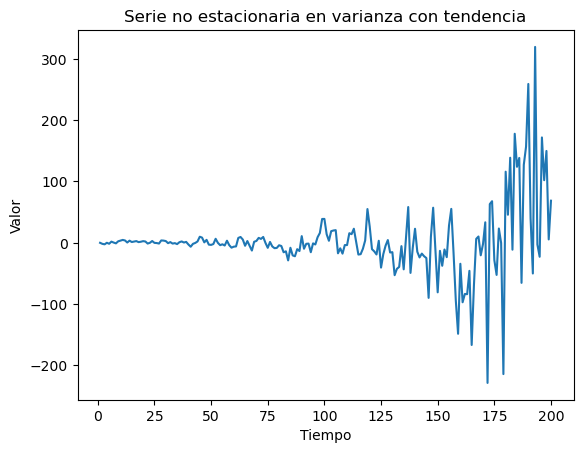

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros del proceso ARIMA
phi = 0.5 # Coeficiente autoregresivo
theta = 0.2 # Coeficiente de media móvil
t = np.arange(1, 201) # Vector de tiempo
sigma = np.exp(0.05 * t) # Varianza que cambia en el tiempo

# Generar la serie
y = np.zeros(len(t))
e = np.random.normal(0, np.sqrt(sigma[0]), size=1) # Error inicial con varianza constante
for i in range(1, len(t)):
    e = np.append(e, np.random.normal(0, np.sqrt(sigma[i]), size=1))
    y[i] = phi * y[i-1] + theta * e[i] + e[i]

# Graficar la serie
plt.plot(t, y)
plt.title("Serie no estacionaria en varianza con tendencia")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.show()


In [1]:
#Probar


In [2]:
'''
def estacionariedad(data,nivelsig):
    adf=adfuller(data)
    print(" Estadistico ADF {}".format(adfuller(data)[0]))
    print(" P-value {}".format(adfuller(data)[1]))
    print('Valores críticos:')
    for key, value in adf[4].items():
        #print('\t%s: %.3f' % (key, value))
        if adf[0] < adf[4]['5%'] and adf[1] < nivelsig:
            print('La serie de tiempo es estacionaria en media y varianza.')
        elif adf[0] < adf[4]['5%'] and adf[1] >= nivelsig:
            print('La serie de tiempo es estacionaria en media pero no en varianza.')
        elif adf[0] >= adf[4]['5%'] and adf[1] < nivelsig:
            print('La serie de tiempo es estacionaria en varianza pero no en media.')
        else:
            print('La serie de tiempo no es estacionaria en media ni en varianza.')

'''        

'\ndef estacionariedad(data,nivelsig):\n    adf=adfuller(data)\n    print(" Estadistico ADF {}".format(adfuller(data)[0]))\n    print(" P-value {}".format(adfuller(data)[1]))\n    print(\'Valores críticos:\')\n    for key, value in adf[4].items():\n        #print(\'\t%s: %.3f\' % (key, value))\n        if adf[0] < adf[4][\'5%\'] and adf[1] < nivelsig:\n            print(\'La serie de tiempo es estacionaria en media y varianza.\')\n        elif adf[0] < adf[4][\'5%\'] and adf[1] >= nivelsig:\n            print(\'La serie de tiempo es estacionaria en media pero no en varianza.\')\n        elif adf[0] >= adf[4][\'5%\'] and adf[1] < nivelsig:\n            print(\'La serie de tiempo es estacionaria en varianza pero no en media.\')\n        else:\n            print(\'La serie de tiempo no es estacionaria en media ni en varianza.\')\n\n'

In [3]:
'''def estacionariedad (data,nivelsig):
    adf=adfuller(data)
    print(" Estadistico ADF {}".format(adf[0]))
    print(" P-value {}".format(adf[1]))
    if adf[1] < nivelsig:
        print("Rechazo Hipotesis Nula de no estacionariedad al {} %".format((1-nivelsig)*100))
    else:
        print("No Rechazo Hipotesis de no estacionariedad al {} %".format((1-nivelsig)*100))
'''

'def estacionariedad (data,nivelsig):\n    adf=adfuller(data)\n    print(" Estadistico ADF {}".format(adf[0]))\n    print(" P-value {}".format(adf[1]))\n    if adf[1] < nivelsig:\n        print("Rechazo Hipotesis Nula de no estacionariedad al {} %".format((1-nivelsig)*100))\n    else:\n        print("No Rechazo Hipotesis de no estacionariedad al {} %".format((1-nivelsig)*100))\n'